## General requirements for the assignment
- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of Assignment 1*
- Post (interesting) errors in the course Github's issue page
  
## Assignment Intro
In this assignment, you will be working with data imports. Data is provided to you both to be downloaded locally and accessed remotely. The final deliverable for the assignment is this ipython notebook with the executed cells active and submitted through your personal GitHub accounts. You will be importing data, conduct some basic data exploration and finally exporting the data and saving it for future use.  

You will be working with this data for the other two GO/NOGO assignments as well. The data is from the Google mobility report. You can find more information about this data here: <https://www.google.com/covid19/mobility/data_documentation.html?hl=en>.

### DEADLINE FOR THIS ASSIGNMENT IS 17 SEPTEMBER 2021 BEFORE 23:59

<hr />


## Import libraries
Update this list as you go along with the assignment

In [570]:
import os
import pandas as pd
import requests
import io
import matplotlib



# PART I - Data Import and Export

#### 1. Download mobility data from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

In [571]:
data_dir = 'C:/Users/rohit/Downloads/Region_Mobility_Report_CSVs/'
country_code = 'NZ'


**Answer: I randomly picked the country New Zealand. I have no specific reason why.**

#### 2. Find the path to the data of your selection. We have prepared some sample code. You need to fill in some parts indicated by 'YOUR CODE HERE'.

In [572]:
all_files = os.listdir(data_dir)
# initilisation
target_file_name = ''
year = '2020'

for file_name in all_files:
    # check if this file is for 2020
    is_year = year
    # if yes, we check if the file name is for the country that you select
    if is_year: 
        # check if the country_code is in the file_name
        is_country = country_code
        if is_country:
            # found the file, save it to 'target_file_name'
            target_file_name = '2020_NZ_Region_Mobility_Report.csv'
            # we stop looking by breaking out of the for loop
            break
if not target_file_name:
    print('File not found. Check your country code (or select a different one)!')
else:
    print('Found file name is: ' + target_file_name)
    # get the path to the file
    file_path = data_dir
    print('Path to the file is: ' + file_path)


Found file name is: 2020_NZ_Region_Mobility_Report.csv
Path to the file is: C:/Users/rohit/Downloads/Region_Mobility_Report_CSVs/


#### 3. Import the 2020 data for this country as a pandas data frame and name it as `df_2020`. Print the first 10 lines of `df_2020`

In [573]:
# Path to the 2020 data of New Zealand
country_data = file_path + target_file_name    

# Read the 2020 data of New Zealand
df_2020 = pd.read_csv(country_data, delimiter = ',')  

# Print the first 10 lines of df_2020
df_2020.head(10)                                 



,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
1,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
2,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0
3,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-18,-1.0,2.0,1.0,8.0,15.0,-1.0
4,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-19,1.0,2.0,0.0,11.0,14.0,-2.0
5,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-20,1.0,0.0,-3.0,11.0,18.0,-2.0
6,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-21,4.0,0.0,-5.0,10.0,17.0,-2.0
7,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-22,7.0,4.0,-12.0,1.0,4.0,2.0
8,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-23,5.0,3.0,-10.0,2.0,1.0,1.0
9,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2020-02-24,-1.0,-1.0,-1.0,18.0,32.0,-3.0


#### We have also stored the data in a remote server. The data for a particular country can be retrieved with the following API:
`http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/{yy}/{CC}` 
#### where yy is either 2020 or 2021, and CC is a 2-letter country code. For example, to get data for 2020 for the Netherlands, the API will be: <http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL>


#### 4. Download the mobility report data of **2021** for the same country (that you have chosen above) using this API and name it as `df_2021`.  Print the first 10 lines of the dataframe

In [574]:
# API URL
api_data = 'http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2021/NZ' 

# Get the data from the API
r = requests.get(api_data).content

# Read the 2021 data of New Zealand
df_2021 = pd.read_csv(io.StringIO(r.decode('utf-8')))

# Print the first 10 lines of df_2021
df_2021.head(10)




,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-01,-32.0,-26.0,41.0,-61.0,-78.0,19.0
1,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-02,-14.0,-10.0,-9.0,-41.0,-32.0,7.0
2,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-03,-1.0,-6.0,-8.0,-38.0,-15.0,4.0
3,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-04,3.0,4.0,60.0,-48.0,-70.0,14.0
4,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-05,5.0,8.0,40.0,-45.0,-43.0,10.0
5,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-06,3.0,4.0,37.0,-44.0,-40.0,9.0
6,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-07,1.0,3.0,11.0,-45.0,-37.0,10.0
7,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-08,-1.0,0.0,-7.0,-47.0,-36.0,12.0
8,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-09,-4.0,-5.0,13.0,-33.0,-8.0,3.0
9,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,ChIJh5Z3Fw4gLG0RM0dqdeIY1rE,2021-01-10,-3.0,-4.0,2.0,-37.0,-8.0,3.0


#### 5. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 10 lines of `df`.

In [575]:
# Combine df_2020 and df_2021
df = pd.concat([df_2020,df_2021]).reset_index(drop=True)

#Print the last 10 lines of df
df.tail(10)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
9474,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-23,-89.0,NaN,-86.0,NaN,-53.0,NaN
9475,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-24,-87.0,NaN,-82.0,NaN,-52.0,NaN
9476,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-25,-89.0,-25.0,-85.0,NaN,-54.0,NaN
9477,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-26,-90.0,-20.0,-86.0,NaN,-51.0,NaN
9478,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-27,-92.0,NaN,-85.0,NaN,-54.0,NaN
9479,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-28,-92.0,NaN,-85.0,NaN,-41.0,NaN
9480,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-29,NaN,NaN,-74.0,NaN,-43.0,NaN
9481,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-30,-87.0,NaN,-79.0,NaN,-47.0,NaN
9482,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-08-31,-87.0,NaN,-77.0,NaN,-47.0,NaN
9483,NZ,New Zealand,West Coast,NaN,NaN,NZ-WTC,NaN,ChIJ2Yjvx8umJW0Romz7lRXnyOE,2021-09-01,-66.0,-18.0,-72.0,NaN,-25.0,NaN


#### 6. `df` now contains mobility data for your selected country from 2020 and 2021. There are three aggregation levels to this data, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Logical operators: <https://realpython.com/python-bitwise-operators/>
- Use pandas [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function 

In [576]:
# Separating data from df into three different dataframes
df_nation = df[df['sub_region_1'].isna() & df['sub_region_2'].isna()]
df_province = df[~df['sub_region_1'].isna() & df['sub_region_2'].isna()]
df_city = df[~df['country_region'].isna() & ~df['sub_region_1'].isna() & ~df['sub_region_2'].isna()]


#### 7. Save `df_nation`, `df_province`, and `df_city` into csv files under folder 'processed_data', and locate this folder under `data_dir`. Name the files `{CC}_nation.csv`, `{CC}_province.csv`, and `{CC}_city.csv`, respectively. `{CC}` stands for your selected country code.

In [577]:
# Change the working directory to dat of the processed data subfolder in the data_dir directory
os.getcwd()
os.chdir(data_dir + 'processed data')

# Write the three different dataframes to csv files
df_nation.to_csv('NZ_nation.csv')
df_province.to_csv('NZ_province.csv')
df_city.to_csv('NZ_city.csv')

<hr />

# PART II - Simple Data Processing

#### 1. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For each of the activities, what are the average percent changes from baselines for your selected country?

In [578]:
print('Average percent changes from baseline for each activity in New Zealand')
print()

# Calculate the mean for each activity
print('Retail and recreation:', df['retail_and_recreation_percent_change_from_baseline'].mean(), '%') 
print('Grocery and pharmacy:', df['grocery_and_pharmacy_percent_change_from_baseline'].mean(), '%') 
print('Parks:', df['parks_percent_change_from_baseline'].mean(), '%') 
print('Transit stations:', df['transit_stations_percent_change_from_baseline'].mean(), '%') 
print('Workplaces:', df['workplaces_percent_change_from_baseline'].mean(), '%') 
print('Residential:', df['residential_percent_change_from_baseline'].mean(), '%') 




Average percent changes from baseline for each activity in New Zealand

Retail and recreation: -9.892946148011703 %
Grocery and pharmacy: -4.192726402679746 %
Parks: -22.702951827060243 %
Transit stations: -32.60242344850172 %
Workplaces: -6.485748090781973 %
Residential: 5.736057500332756 %


#### 2. Let's look into data from different provinces. How many provinces are there in the data of your selected country? Print all of them.

In [579]:
# Count the number of provinces in New Zealand
print('There are', df['sub_region_1'].nunique(), 'provinces in New Zealand.')

# Print all the names of the provinces in New Zealand
print()

print('The names of the provinces of New Zealand:', (df['sub_region_1'].unique()))


There are 16 provinces in New Zealand.

The names of the provinces of New Zealand: [nan 'Auckland' 'Bay of Plenty' 'Canterbury' 'Gisborne' "Hawke's Bay"
 'Manawatu-Wanganui' 'Marlborough' 'Nelson' 'Northland' 'Otago'
 'Southland' 'Taranaki' 'Tasman' 'Waikato' 'Wellington' 'West Coast']


#### 3. You can get a summary of each of the provinces using pandas describe function. Using this, find which province experienced the largest (average) changes in workplaces.

In [580]:
# Calculate which province had experienced the largest average changes in workplaces
# I did not use the describe function. I used the groupby function.
group = df['workplaces_percent_change_from_baseline'].groupby(df['sub_region_1'])
mean = group.mean().sort_values(ascending=False)
print(mean)

# From the list it can be seen that the largest positive change happened in the province Gisborne.
# If the largest change (whether positive or negative) was meant in the question, then Auckland has 
# experienced the largest negative change.
# I continued with the province Gisborne.

sub_region_1
Gisborne              2.872763
Manawatu-Wanganui     2.452594
Bay of Plenty        -3.409253
West Coast           -3.806794
Hawke's Bay          -3.964222
Tasman               -4.266667
Taranaki             -5.290741
Southland            -5.709259
Waikato              -7.031858
Nelson               -7.409259
Northland            -8.017889
Marlborough          -8.227778
Canterbury           -8.907965
Otago               -10.431127
Wellington          -12.083186
Auckland            -16.341593
Name: workplaces_percent_change_from_baseline, dtype: float64


#### 4. Create a new dataframe that only contains data from the province with the largest changes in workplaces, which you found in the previous question.

In [581]:
# Select only data from Gisborne, the province with the largest positive changes in the workplace
gisborne = df.loc[df['sub_region_1'] == 'Gisborne']


#### 5. We're going to look at the changes of this province over time. As you can see, the column date is in string format. Convert this str date column data str to datetime format and append as an extra column called 'date2' to the dataframe.  
Hint: <https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html>

In [582]:
# Convert data column to datetime format and append it as new column date2 to the dataframe
df = df.assign(date2 = pd.to_datetime(df['date']))


#### 6. Sort the data in ascending order of time and save it as 'df_province_largest'

In [583]:
# Sort the data in ascending order of time
df_province_largest = df.sort_values(by='date2', ascending=True)


<AxesSubplot:xlabel='date2'>

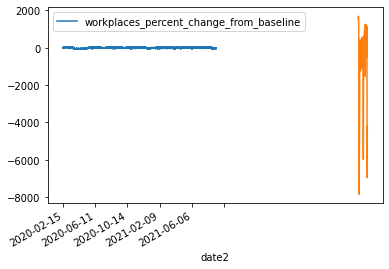

In [584]:
# Execute the cell with the following command to visualize the results
df_province_largest.plot('date', 'workplaces_percent_change_from_baseline')

df_province_largest.resample('7D', on='date2').sum()['workplaces_percent_change_from_baseline'].plot()

#### 7. Compare the results above with the results in the google mobility report pdf of your selected province. Discuss the differences and similarities. Please save the mobility report pdf that you use to compare the results with! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)

**Answer: the blue plot in the image above shows a very low change in workplaces from baseline. When I plot only first image, it is different then the image in the mobility report. This does make sense, since the data I used to calculate is from 2020 and 2021, while the mobility report is only from 2021. The resampled plot shows a vertical line with a wide margin running from -8000 til almost 2000 percent changes. I think something went wrong there, but I was not able to figure what.**